*PyTorch CheatSheet* : https://pytorch.org/tutorials/beginner/ptcheat.html

**Workflow**
1. Get data ready (turn into tensors)
2. Build or pick a pretrained model
    - Pick a loss function & optimizer
    - Build a training loop
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

In [79]:
import torch

In [80]:
workflow = {1: "Get data ready (turn into tensors)",
                        2: "Build or pick a pretrained model",
                        3: "Fit the model to the data and make a prediction",
                        4: "Evaluate the model",
                        5: "Improve through experimentation",
                        6: "Save and reload your trained model"}

In [81]:
workflow

{1: 'Get data ready (turn into tensors)',
 2: 'Build or pick a pretrained model',
 3: 'Fit the model to the data and make a prediction',
 4: 'Evaluate the model',
 5: 'Improve through experimentation',
 6: 'Save and reload your trained model'}

In [82]:
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.5.1+cu121'

`torch.nn` : https://pytorch.org/docs/main/nn.html

### 1. Data (Preparing and Loading)

Data can be almost anything... in machine Learning

- Excel Spreadsheet
- Images of any kind
- Videos
- Audios
- DNA

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

In [83]:
# Create Known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [84]:
len(X), len(y)

(50, 50)

#### Splitting data into training and test sets

In [85]:
train_split = int(0.8 * len(X))
train_split

40

In [86]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

How might we better visualize our data?

In [87]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    plt.figure(figsize=(10,7))

    # Plot training data in Blue
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = "Predictions")

    # Show legend
    plt.legend(prop={"size":14});

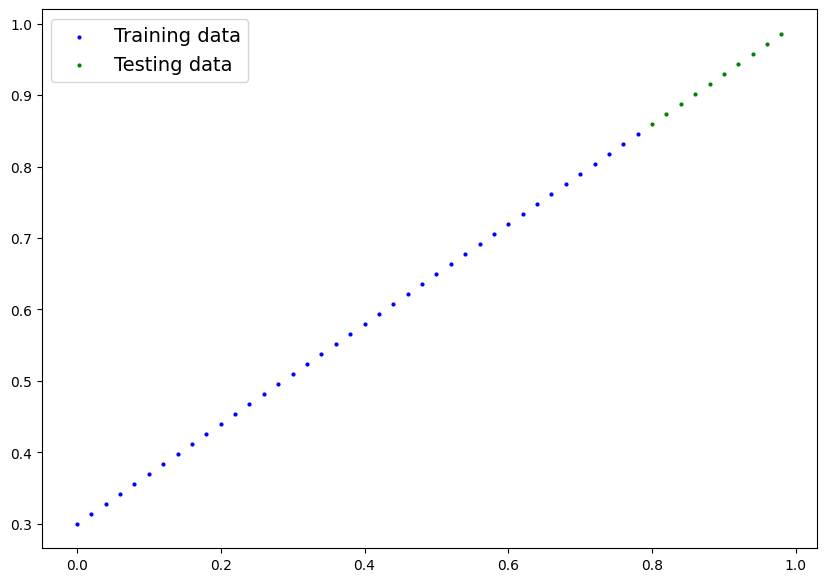

In [88]:
plot_prediction()

### 2. Build Model

Our first PyTorch Model

`What our model does?`
- Start with random values (weight and bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

`How does it do so?`

Through two main algorithms:
1. Gradient descent
2. Backpropagation

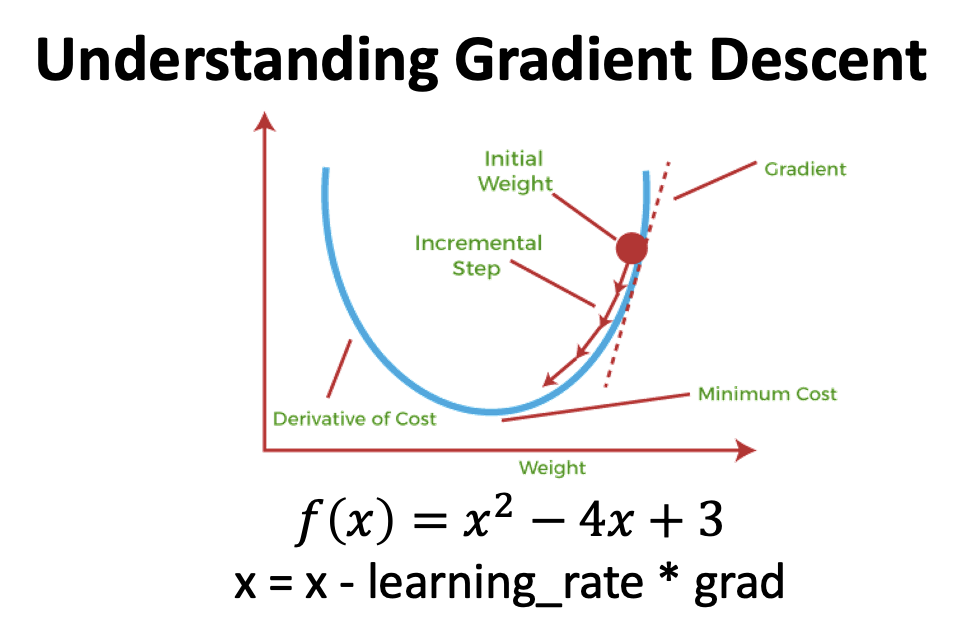

In [89]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                                requires_grad=True, # <- can this parameter be updated via gradient descent?
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor)->torch.Tensor: # "x" is the input data
        return self.weights * x + self.bias  # this is linear regression formula

- `requires_grad = True` means PyTorch will track the gradients of this specific parameter for use with `torch.autograd` and gradient descent

- Any subclass of `nn.Module` needs to override `forward()` (this defines the forward computation of the model)

#### PyTorch model building essentials

- torch.nn : contains all of the buildings for computational graphs (a neural network can be considered computational graph)
- torch.nn.Parameter : what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
- torch.nn.Module : The base class for all neural network modules, if you subclass it, you should override `forward()`
- torch.optim : This is where optimizers in PyTorch live, they will help with gradient descent
- def forward() : All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [90]:
workflow

{1: 'Get data ready (turn into tensors)',
 2: 'Build or pick a pretrained model',
 3: 'Fit the model to the data and make a prediction',
 4: 'Evaluate the model',
 5: 'Improve through experimentation',
 6: 'Save and reload your trained model'}

**Get data ready**
- torchvision.transforms
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

**Pick a loss function and optimizer**
- torch.optim : for optimizer
- torch.nn
- torch.nn.Module
- torchvision.models

**Evaluate the model**
- torchmetrics

**Improve through experimentations**
- torch.utils.tensorboard

In [91]:
# We can check our model parameters or what's inside our model using .parameters()

# Create a random seed
torch.manual_seed(42)

# Create an instance of the module (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
model_0.parameters()

<generator object Module.parameters at 0x789421272110>

In [92]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [93]:
torch.randn(1)

tensor([0.2345])

In [94]:
torch.randn(1)

tensor([0.2303])

In [95]:
torch.randn(4)

tensor([-1.1229, -0.1863,  2.2082, -0.6380])

In [96]:
torch.manual_seed(11)
torch.randn(3)

tensor([ 0.7376,  1.9459, -0.6995])

In [97]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

`state_dict()`

In [98]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [99]:
weight, bias

(0.7, 0.3)

Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [100]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [101]:
# Make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)

# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

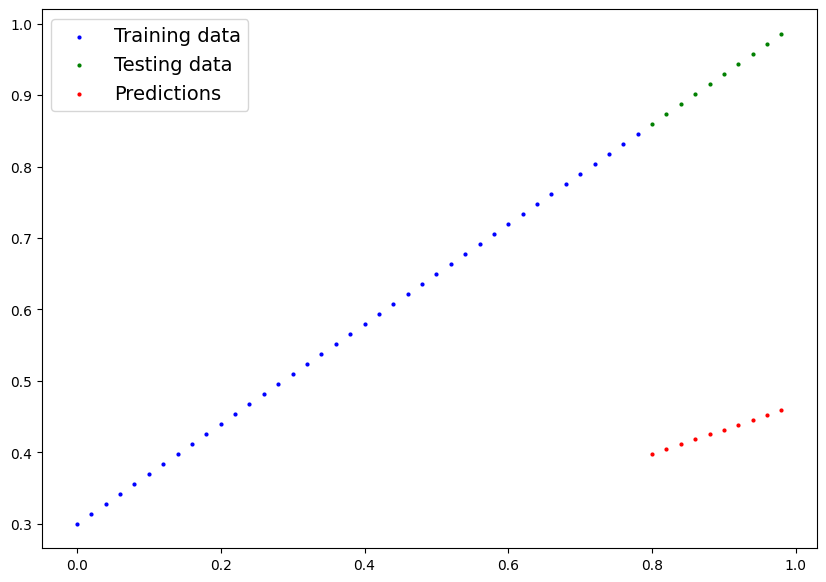

In [102]:
plot_prediction(predictions = y_preds)

#### Setting up a loss function and optimizer

### 3. Train Model
The whole idea of training for the model is to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a `loss function`.

`Loss function may also be called **cost function** or **criterion** in different areas.`

**Loss Function** : A function to measure how wrong your model's prediction are to the ideal outputs, lower the better!!

**Optimizer** : Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case) to improve the loss function.

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [103]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [104]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**Loss Functions** : https://pytorch.org/docs/stable/nn.html#loss-functions

L1Loss

---

measures the mean absolute error (MAE) between each element in the input
x and target y.

In [105]:
# Setup a loss function
loss_function = nn.L1Loss()

In [106]:
loss_function

L1Loss()

An "**optimizer**" is an algorithm that is used to adjust the parameters of a neural network during training by calculating and applying updates based on the calculated gradients, aiming to minimize the loss function and improve the model's performance.

https://pytorch.org/docs/stable/optim.html#module-torch.optim

In [107]:
# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.01)      # Learning Rate

In [108]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

#### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward Pass (this involves data moving through our model's `forward()` function) to make predictions on data- also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagations**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [109]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [110]:
# An epoch is one loop through the data... (this is a hyperparameter)
epochs = 1

# TRAINING
# 0. Loop through the data
for epoch in range(epochs):
    model_0.train() # By Default

    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Loss Calculation
    loss = loss_function(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss w.r.t. the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
    # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration of the loop.

    model_0.eval() # Turns off the gradient tracking

    # Print out model state_dict()
    print(model_0.state_dict())  # Can see the parameters changing with each time you run this cell

Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])


In [111]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

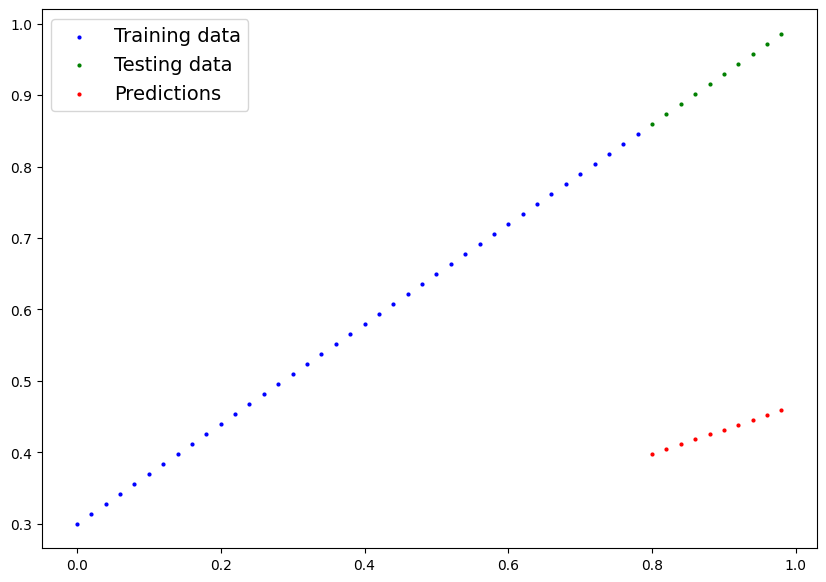

In [112]:
plot_prediction(predictions=y_preds)

In [113]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

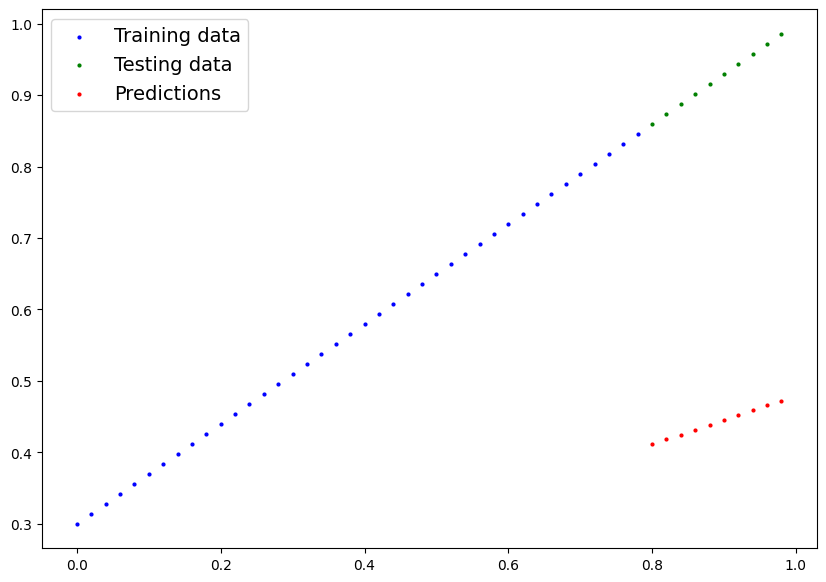

In [114]:
plot_prediction(predictions=y_preds_new)

Let's increase epochs to 100 and see the change...

Also adding TESTING CODE

In [115]:
# An epoch is one loop through the data... (this is a hyperparameter)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# TRAINING
# 0. Loop through the data
for epoch in range(epochs):
    model_0.train() # By Default

    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Loss Calculation
    loss = loss_function(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss w.r.t. the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
    # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration of the loop.

    model_0.eval() # Turns off the gradient tracking

    # TESTING
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # TURNS OFF GRADIENT TRACKING and couple of more things behind the scene ::: We may also see torch.no_grad() in older PyTorch code
        # 1. Forward Pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_function(test_pred, y_test)

    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        # Print out model state_dict()
        print(model_0.state_dict())  # Can see the parameters changing with each time you run this cell



Loss: 0.3013603389263153
Epoch: 0 | Loss: 0.3013603389263153 | Test Loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Loss: 0.18615034222602844
Epoch: 10 | Loss: 0.18615034222602844 | Test Loss: 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Loss: 0.08227583020925522
Epoch: 20 | Loss: 0.08227583020925522 | Test Loss: 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Loss: 0.07638873159885406
Loss: 0.0

In [116]:
weight, bias # Ideally

(0.7, 0.3)

In [117]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

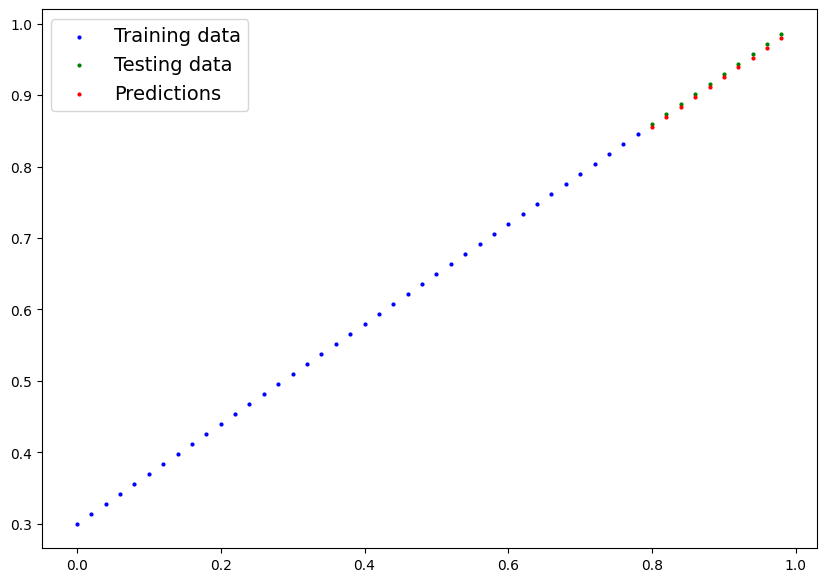

In [118]:
plot_prediction(predictions=y_preds_new)

In [119]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3014, grad_fn=<MeanBackward0>),
  tensor(0.1862, grad_fn=<MeanBackward0>),
  tensor(0.0823, grad_fn=<MeanBackward0>),
  tensor(0.0518, grad_fn=<MeanBackward0>),
  tensor(0.0450, grad_fn=<MeanBackward0>),
  tensor(0.0413, grad_fn=<MeanBackward0>),
  tensor(0.0379, grad_fn=<MeanBackward0>),
  tensor(0.0344, grad_fn=<MeanBackward0>),
  tensor(0.0310, grad_fn=<MeanBackward0>),
  tensor(0.0275, grad_fn=<MeanBackward0>),
  tensor(0.0241, grad_fn=<MeanBackward0>),
  tensor(0.0207, grad_fn=<MeanBackward0>),
  tensor(0.0172, grad_fn=<MeanBackward0>),
  tensor(0.0138, grad_fn=<MeanBackward0>),
  tensor(0.0104, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0035, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>)],
 [tensor(

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

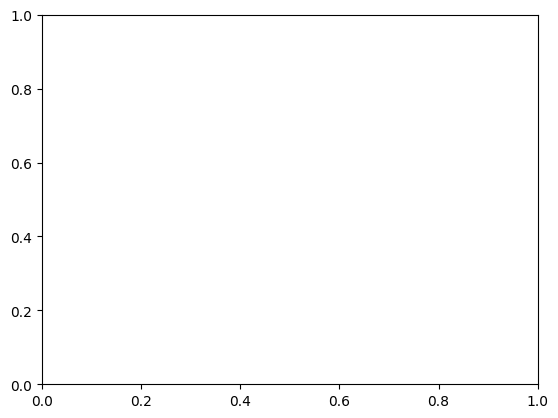

In [120]:
plt.plot(epoch_count, loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [121]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy())

array([0.30136034, 0.18615034, 0.08227583, 0.05181945, 0.04503796,
       0.04132963, 0.03785244, 0.03441364, 0.03097964, 0.02754883,
       0.02411001, 0.02067771, 0.0172452 , 0.0138064 , 0.01037578,
       0.00694158, 0.00350277, 0.00258851, 0.00258851, 0.00258851],
      dtype=float32)

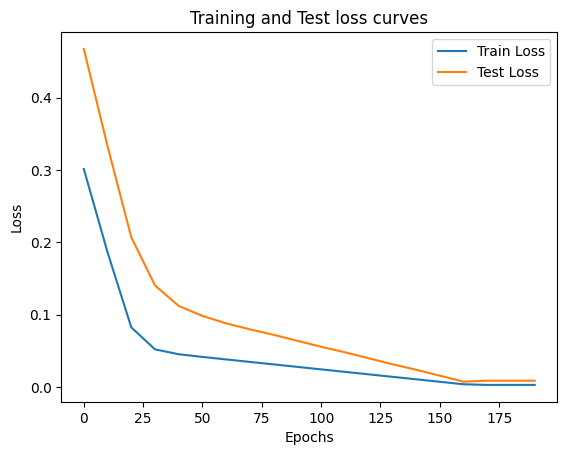

In [122]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label = "Test Loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [123]:
model_0

LinearRegressionModel()

#### Saving the model

There are three main methods for saving and loading models in PyTorch

- `torch.save()` - allows to save a PyTorch object in Python's pickle format.
- `torch.load()` - allows to load a saved PyTorch object
- `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary



In [124]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [125]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "PyTorch_Workflow.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"SAVING THE MODEL AT: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

SAVING THE MODEL AT: models/PyTorch_Workflow.pt


In [126]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1550 Dec 20 08:43 PyTorch_Workflow.pt


### Loading a PyTorch Model
Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [127]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

print(loaded_model_0.state_dict()) # Initially

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

OrderedDict([('weights', tensor([-1.3023])), ('bias', tensor([-0.5133]))])


<ipython-input-127-b58e5ec3c562>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [128]:
loaded_model_0.state_dict() # Finally

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [129]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [130]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [131]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [132]:
# Import PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu121'

Create device-agnostic code

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU.

In [133]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [134]:
! nvidia-smi

Fri Dec 20 08:43:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0              27W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### 6.1 Data

In [135]:
# Create some data using the linear regression formula : y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (feature and label)
X =  torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [136]:
# Split the data
train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

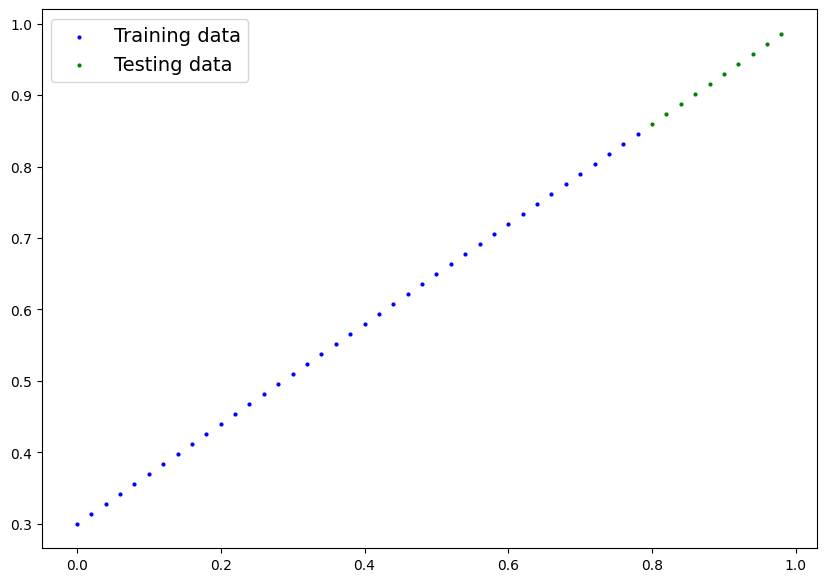

In [137]:
# Plot the data
# NOTE: If you don't have the plot_predictions() function, which is created above, this will throw an error
plot_prediction(X_train, y_train, X_test, y_test)

#### 6.2 Building a PyTorch Linear Model

In [138]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters / also called : linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1) # take one i/p feature and give one o/p feature

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [139]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [140]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

#### 6.3 Training

For training we need:
- Loss function
- Optimizer
- Training Loop
- Testing Loop

In [141]:
# Setup the Loss Function
loss_fn = nn.L1Loss() #same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.01)

In [142]:
# Let's write a trainig loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform Backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # TESTING
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # Printing out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Test Loss : {test_loss}")

Epoch: 0 | Test Loss : 0.5739762187004089
Epoch: 10 | Test Loss : 0.4392664134502411
Epoch: 20 | Test Loss : 0.30455657839775085
Epoch: 30 | Test Loss : 0.16984669864177704
Epoch: 40 | Test Loss : 0.03513690456748009
Epoch: 50 | Test Loss : 0.04784907028079033
Epoch: 60 | Test Loss : 0.045803118497133255
Epoch: 70 | Test Loss : 0.037530567497015
Epoch: 80 | Test Loss : 0.02994490973651409
Epoch: 90 | Test Loss : 0.02167237363755703
Epoch: 100 | Test Loss : 0.014086711220443249
Epoch: 110 | Test Loss : 0.005814164876937866
Epoch: 120 | Test Loss : 0.013801801018416882
Epoch: 130 | Test Loss : 0.013801801018416882
Epoch: 140 | Test Loss : 0.013801801018416882
Epoch: 150 | Test Loss : 0.013801801018416882
Epoch: 160 | Test Loss : 0.013801801018416882
Epoch: 170 | Test Loss : 0.013801801018416882
Epoch: 180 | Test Loss : 0.013801801018416882
Epoch: 190 | Test Loss : 0.013801801018416882


In [143]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [144]:
weight, bias

(0.7, 0.3)

#### 6.4 Making and Evaluating predictions

In [145]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds_1 = model_1(X_test)

In [146]:
y_preds_1

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

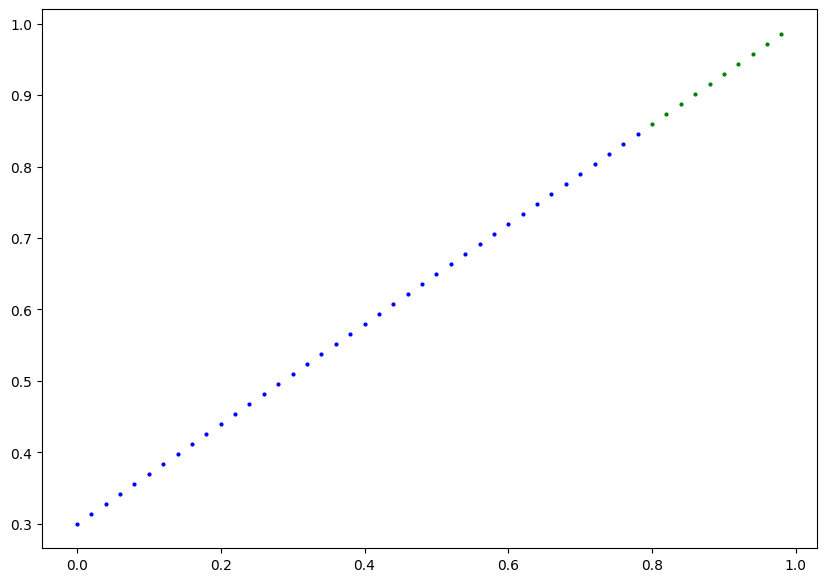

In [147]:
plot_prediction(predictions = y_preds_1)

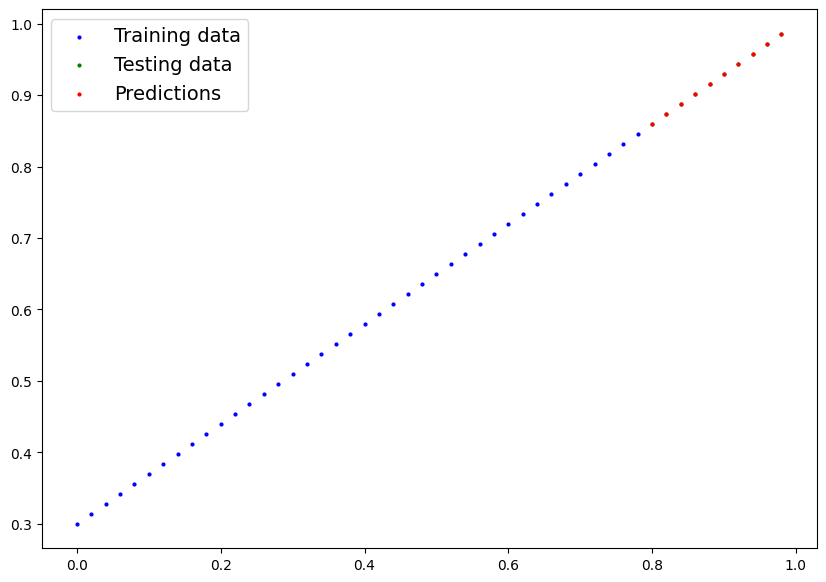

In [156]:
plot_prediction(predictions = y_preds_1.cpu())

#### 6.5 Saving and loading the model

In [161]:
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create a model save path
MODEL_NAME = "Overall_Workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
print(f"Saving the model at location : {MODEL_SAVE_PATH}")

torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving the model at location : models/Overall_Workflow.pth


In [162]:
# Load the model

loaded_model1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model1.to(device)

<ipython-input-162-e2713026fb91>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [163]:
next(loaded_model1.parameters()).device

device(type='cuda', index=0)

In [164]:
loaded_model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [165]:
# Evaluate loaded model

loaded_model1.eval()
with torch.inference_mode():
    loaded_model1_preds = loaded_model1(X_test)

y_preds_1 == loaded_model1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')